## Cleaning and exploring the five data sets

I used Excel to:
- replace blanks with 'N/A'
- change the column names to lower case and replace spaces with underscore 

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datetime_is_numeric=True

## The demographics data

In [2]:
# Read the demographics data.
# The Excel file with the data is in the repository together with the Python code.
df_demographics = pd.read_excel('01_change_2022_demographics_data_writeback_091122.xlsx')

In [3]:
# View the demographics dataframe.
df_demographics

,requested_url_path,campaign,creative_size,audience,ad_format,date,creative_family,creative_version,ad_platform,company_name,impressions,clicks,days_away_from_max_date,latest_report
0,NaN,FY23_change_digital_phase3,NaN,General Targetting,Scotsman,2022-06-15,Trade Media Ads,Rate Lock,Trade Media,The Loan Pros Team,1,1,138,0
1,https://api.linkedin.com/v2/adAnalyticsV2?q=an...,Audience 5 - DSC,NaN,5,Single image,2022-08-15,CloseFaster,3steps,LinkedIn,Excellence Real Estate,4,0,77,0
2,https://api.linkedin.com/v2/adAnalyticsV2?q=an...,Audience 1 - Carousel Ads,NaN,1,Carousel,2022-07-25,UnfairAdvantage,All,LinkedIn,South Metro Denver REALTOR Association,3,0,98,0
3,https://api.linkedin.com/v2/adAnalyticsV2?q=an...,Audience 1 - Video,NaN,1,Video,2022-05-18,CloserTwins,ShapeUp,LinkedIn,"Blue Home Loans,",3,0,166,0
4,NaN,4 - StackAdapt - Audio,NaN,4,Audio,2022-05-07,CloserTwins,Cutdown1A,Domain Display,Td Finance,1,0,177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145643,NaN,3 - StackAdapt - Native,NaN,3,Native,2022-10-29,UnfairAdvantage,NoDTI,Domain Display,Guarantee Mortgage,12,0,2,1
145644,https://api.linkedin.com/v2/adAnalyticsV2?q=an...,Audience 3 - Video,NaN,3,Video,2022-05-11,CloserTwins,Cutdown1B,LinkedIn,Norcom Mortgage,44,0,173,0
145645,https://api.linkedin.com/v2/adAnalyticsV2?q=an...,Audience 4 - DSC,NaN,4,Single image,2022-07-18,CloseFaster,3steps,LinkedIn,Fairway Asset,4,0,105,0
145646,NaN,Competitive Opportunity Campaign - Display,728X90,General Targetting,Display,2022-04-15,CompetitiveOpportunity,Theycancelweclose,Domain Display,"GoPrime Mortgage,",2,0,199,0


In [4]:
# View information.
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145648 entries, 0 to 145647
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   requested_url_path       97804 non-null   object        
 1   campaign                 144852 non-null  object        
 2   creative_size            3276 non-null    object        
 3   audience                 145648 non-null  object        
 4   ad_format                145552 non-null  object        
 5   date                     145648 non-null  datetime64[ns]
 6   creative_family          113005 non-null  object        
 7   creative_version         123008 non-null  object        
 8   ad_platform              145648 non-null  object        
 9   company_name             145647 non-null  object        
 10  impressions              145648 non-null  int64         
 11  clicks                   145648 non-null  int64         
 12  days_away_from_m

**Comment on data types**\
All data types seem reasonable except for the one for 'latest_report' which should be boolean.

In [5]:
# Change 'latest_report' from int64 to boolean.
df_demographics['latest_report'] = df_demographics['latest_report'].astype(bool)

In [6]:
# View information to check data type change happened as expected.
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145648 entries, 0 to 145647
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   requested_url_path       97804 non-null   object        
 1   campaign                 144852 non-null  object        
 2   creative_size            3276 non-null    object        
 3   audience                 145648 non-null  object        
 4   ad_format                145552 non-null  object        
 5   date                     145648 non-null  datetime64[ns]
 6   creative_family          113005 non-null  object        
 7   creative_version         123008 non-null  object        
 8   ad_platform              145648 non-null  object        
 9   company_name             145647 non-null  object        
 10  impressions              145648 non-null  int64         
 11  clicks                   145648 non-null  int64         
 12  days_away_from_m

In [7]:
# For consistency, in the column 'audience' replace the value 'General Targetting' with '6'.
df_demographics['audience'] = df_demographics['audience'].replace(['General Targetting'], '6')

In [8]:
# Check the replacement worked as expected.
df_demographics['audience']

0         6
1         5
2         1
3         1
4         4
         ..
145643    3
145644    3
145645    4
145646    6
145647    4
Name: audience, Length: 145648, dtype: object

In [9]:
# Create dictionary to map audiences to target groups.
audience_dict = {'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               '6':'3'}
 
# Add a new column 'target_group'
df_demographics['target_group'] = df_demographics['audience'].map(audience_dict)

In [10]:
# See range of dates covered by the data.
df_demographics['date'].describe()

/var/folders/4t/_v2kwfh12990mh64bplbk8cr0000gn/T/ipykernel_12097/3951070046.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_demographics['date'].describe()


count                  145648
unique                    137
top       2022-05-18 00:00:00
freq                     8697
first     2022-04-01 00:00:00
last      2022-10-31 00:00:00
Name: date, dtype: object

**Comment**\
The demographics data covers the seven months from 1 April 2022 to 31 October 2022.

In [11]:
df_demographics['latest_report'].value_counts()

False    136528
True       9120
Name: latest_report, dtype: int64

In [12]:
df_dem_camp = df_demographics['campaign'].value_counts()

In [13]:
df_dem_camp

4 - StackAdapt - Display - Image                               14118
Audience 5 - Video                                             12624
Audience 4 - Video                                              9439
Audience 1 - Video                                              9287
Audience 4 - DSC                                                9076
                                                               ...  
Audience 2 CRM - No Lock Campaign - Carousel (Updated)             1
Audience 3 CRM - No Lock Campaign - Carousel (Extended 9.9)        1
Audience 2 CRM - No Lock Campaign - Carousel (Extended 9.9)        1
2 - StackAdapt - Audio                                             1
Audience 1 CRM - No Lock Campaign - Carousel (Extended 9.9)        1
Name: campaign, Length: 85, dtype: int64

In [14]:
df_dem_camp = df_dem_camp.reset_index()

In [15]:
df_dem_camp.columns = ['campaign_name', 'count']

In [16]:
df_dem_camp

,campaign_name,count
0,4 - StackAdapt - Display - Image,14118
1,Audience 5 - Video,12624
2,Audience 4 - Video,9439
3,Audience 1 - Video,9287
4,Audience 4 - DSC,9076
...,...,...
80,Audience 2 CRM - No Lock Campaign - Carousel (...,1
81,Audience 3 CRM - No Lock Campaign - Carousel (...,1
82,Audience 2 CRM - No Lock Campaign - Carousel (...,1
83,2 - StackAdapt - Audio,1


In [17]:
df_dem_camp.head(10)

,campaign_name,count
0,4 - StackAdapt - Display - Image,14118
1,Audience 5 - Video,12624
2,Audience 4 - Video,9439
3,Audience 1 - Video,9287
4,Audience 4 - DSC,9076
5,Follower Ads - Domain List,8710
6,Audience 5 - DSC,7628
7,4 - StackAdapt - Native,6607
8,Follower Ads - Demographic Targeting,6309
9,Audience 4 - Carousel Ads,6309


<AxesSubplot:ylabel='Frequency'>

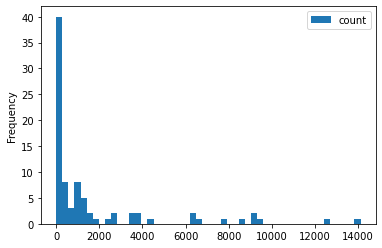

In [18]:
df_dem_camp.plot(kind = 'hist', bins = 50)

## The campaigns data

In [19]:
# Read the campaigns data.
df_campaigns = pd.read_excel('02_change_2022_creative_cata_writeback_091122.xlsx')

In [20]:
# View the campaigns dataframe.
df_campaigns

,requested_url_path,campaign,ad_format,clicks,spend,creative_size,date,impressions,reach,audience,...,creative_family,creative_version,100%_video_views,video_starts,follows,days_away_from_max_date,latest_report,ctr,ctr_score,weighted_ctr_score
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,CloseFaster,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,CloserTwins,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,CloserTwins,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,CloserTwins,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,CloserTwins,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,CloserTwins,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN


In [21]:
# For consistency, in the column 'audience' replace the value 'General Targetting' with '6'.
df_campaigns['audience'] = df_campaigns['audience'].replace(['General Targetting'], '6')

In [22]:
# View information.
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102068 entries, 0 to 102067
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   requested_url_path       14205 non-null   object        
 1   campaign                 101996 non-null  object        
 2   ad_format                101997 non-null  object        
 3   clicks                   90191 non-null   float64       
 4   spend                    102068 non-null  object        
 5   creative_size            73485 non-null   object        
 6   date                     102068 non-null  datetime64[ns]
 7   impressions              102068 non-null  int64         
 8   reach                    80824 non-null   float64       
 9   audience                 102027 non-null  object        
 10  ad_platform              102068 non-null  object        
 11  creative_family          101185 non-null  object        
 12  creative_version

In [23]:
df_campaigns['spend'].describe()

count     102068
unique     71337
top            0
freq        6978
Name: spend, dtype: int64

In [24]:
# Change the 'spend' data type from object to float.
df_campaigns['spend'] = pd.to_numeric(df_campaigns['spend'], errors='coerce')

In [25]:
df_campaigns['spend'].dtype

dtype('float64')

In [26]:
# Create new column target_group.
audience_dict = {'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               '6':'3'}
 
# Add a new column 'target_group'
df_campaigns['target_group'] = df_campaigns['audience'].map(audience_dict)

In [27]:
df_campaigns['date'].describe()

/var/folders/4t/_v2kwfh12990mh64bplbk8cr0000gn/T/ipykernel_12097/3258476264.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_campaigns['date'].describe()


count                  102068
unique                    220
top       2022-04-28 00:00:00
freq                      879
first     2022-03-26 00:00:00
last      2022-10-31 00:00:00
Name: date, dtype: object

In [28]:
df_campaigns['reach'].describe()

count    80824.000000
mean       181.905647
std        594.494490
min          0.000000
25%          4.000000
50%         18.000000
75%         95.250000
max      16601.000000
Name: reach, dtype: float64

In [29]:
df_campaigns['impressions'].describe()

count    102068.000000
mean        462.165899
std        1562.904732
min           0.000000
25%          10.000000
50%          55.000000
75%         283.000000
max       59784.000000
Name: impressions, dtype: float64

In [30]:
df_campaigns['clicks'].describe()

count    90191.000000
mean         0.749022
std          3.532613
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        573.000000
Name: clicks, dtype: float64

In [31]:
df_campaigns['ctr'].describe()

count    89239.000000
mean         0.014065
std          0.088537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: ctr, dtype: float64

In [32]:
df_campaigns['ctr_score'].describe()

count    75018.000000
mean         0.641959
std          0.346197
min          0.500000
25%          0.500000
50%          0.500000
75%          0.500000
max          1.500000
Name: ctr_score, dtype: float64

In [33]:
df_campaigns['ctr_score'].value_counts()

0.5    64075
1.5    10356
1.0      587
Name: ctr_score, dtype: int64

In [34]:
df_campaigns['weighted_ctr_score'].describe()

count    75018.000000
mean       332.210723
std       1042.641833
min          0.500000
25%          9.500000
50%         45.500000
75%        251.375000
max      82870.500000
Name: weighted_ctr_score, dtype: float64

In [35]:
df_campaigns['audience'].value_counts()

6                   21683
4                   20706
1                   16567
3                   16104
5                   14388
2                   12577
Domain Targeting        2
Name: audience, dtype: int64

In [36]:
df_explore = df_campaigns.groupby('creative_family').weighted_ctr_score.mean()

In [37]:
df_explore.reset_index()

,creative_family,weighted_ctr_score
0,Ad1,7.625000
1,Ad1 Audience 3 CRM,13.000000
2,Ad1 Domain,8992.450000
3,Ad1 audience 1,47.000000
4,Carousel Ad1,3343.425000
5,Carousel Ad1 - CRM Audience 1,41.300000
6,Carousel Ad1 - CRM Audience3,3.428571
7,Carousel Ad2 - CRM Audience 2,3.687500
8,CloseFaster,295.030384
9,CloserTwins,323.583147


## The goal stats data

In [38]:
# Read the goal statistics data.
df_goal = pd.read_excel('03_goal_stats_web_traffic.xlsx')

In [39]:
# View the dataframe.
df_goal

,date,campaign,audience,creative_family,creative_version,ad_platform,ad_format,goal,completions,campaign_traffic,days_away_from_max_date,latest_report
0,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),2,General traffic,213,0
1,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Form Submission,2,General traffic,213,0
2,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Home Page Video Play,1,General traffic,213,0
3,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Closer Twins Banner),1,General traffic,213,0
4,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,Learn More (Community Mortgage),18,General traffic,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16504,2022-10-25,FY23_broker_campaign,NaN,UnfairAdvantage,OnePage,Domain Display,NaN,Learn More (Community Mortgage),1,Campaign,6,1
16505,2022-10-26,FY23_broker_campaign,NaN,UnfairAdvantage,OnePage,Domain Display,NaN,Learn More (Community Mortgage),1,Campaign,5,1
16506,2022-10-26,FY23_broker_campaign,NaN,UnfairAdvantage,OnePage,Domain Display,NaN,Learn More (Our Story),1,Campaign,5,1
16507,2022-10-26,FY23_broker_campaign,NaN,UnfairAdvantage,OnePage,Domain Display,NaN,Start Closing More,1,Campaign,5,1


In [40]:
# For consistency, in the column 'audience' replace the value 'General Targetting' with '6'.
df_goal['audience'] = df_goal['audience'].replace(['General Targetting'], '6')

In [41]:
# Add a new column 'target_group'
df_goal['target_group'] = df_goal['audience'].map(audience_dict)

In [42]:
# View information.
df_goal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16509 entries, 0 to 16508
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     16509 non-null  datetime64[ns]
 1   campaign                 4823 non-null   object        
 2   audience                 4242 non-null   object        
 3   creative_family          4594 non-null   object        
 4   creative_version         4294 non-null   object        
 5   ad_platform              4549 non-null   object        
 6   ad_format                4427 non-null   object        
 7   goal                     16509 non-null  object        
 8   completions              16509 non-null  int64         
 9   campaign_traffic         16509 non-null  object        
 10  days_away_from_max_date  16509 non-null  int64         
 11  latest_report            16509 non-null  int64         
 12  target_group             4236 no

In [43]:
# Change the 'completions' data type to float.
df_goal['completions'] = df_goal['completions'].astype(float)

In [44]:
df_goal['date'].describe()

/var/folders/4t/_v2kwfh12990mh64bplbk8cr0000gn/T/ipykernel_12097/1470676339.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_goal['date'].describe()


count                   16509
unique                    214
top       2022-04-26 00:00:00
freq                      154
first     2022-04-01 00:00:00
last      2022-10-31 00:00:00
Name: date, dtype: object

In [45]:
df_goal['goal'].value_counts()

Learn More (Community Mortgage)     9382
Start Closing More                  4027
Learn More (Our Story)              1044
Get Approved                         930
Learn More (Closer Twins Banner)     484
Form Submission                      459
Broker Login                          94
Closer Twins Page Video Play          60
Home Page Video Play                  27
utm_audience                           1
test4                                  1
Name: goal, dtype: int64

In [46]:
df_goal['completions'].describe()

count    16509.000000
mean         2.667575
std          4.415329
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        116.000000
Name: completions, dtype: float64

In [47]:
df_goal['audience'].value_counts()

6        3863
5         153
4         108
1          68
2          23
3          21
1to4        4
test4       2
Name: audience, dtype: int64

In [48]:
df_goal['creative_family'].value_counts()

SEM Ads                   3533
UnfairAdvantage            320
CloserTwins                307
Trade Media Ads            230
CloseFaster                125
domain                      16
August                      16
CompetitiveOpportunity      15
newsletter                   7
One-Off                      7
08-29-2022                   4
SnapdocsLive                 3
crm                          3
08-24-2022                   2
2022-06-09 00:00:00          1
219526440                    1
08-25-2022                   1
All3                         1
ComingSoon                   1
2022-08-09 00:00:00          1
Name: creative_family, dtype: int64

In [49]:
df_goal.groupby('creative_family')

## The general stats data

In [50]:
# Read the general statistics data.
df_general = pd.read_excel('04_general_stats_web_traffic.xlsx')

In [51]:
# View the general statistics dataframe.
df_general

,date,audience,creative_family,creative_version,ad_platform,ad_format,campaign_traffic,total_sessions,total_bounces,total_duration,days_away_from_max_date,latest_report
0,2022-08-16,NaN,CloserTwins,Cutdown1A,Domain Display,Video,Campaign,1,0,73.0,76,0
1,2022-06-16,3,CloseFaster,NoDTI,Facebook,Single image,Campaign,1,0,0.0,137,0
2,2022-08-29,1,CloseFaster,MoreAll,User ID Display,NaN,Campaign,2,0,0.0,63,0
3,2022-06-09,4,UnfairAdvantage,1page,LinkedIn,Single image,Campaign,2,0,50.0,144,0
4,2022-08-03,1,UnfairAdvantage,1099,Domain Display,Single image,Campaign,1,0,0.0,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13189,2022-05-06,4,CloserTwins,Cutdown1B,LinkedIn,Video,Campaign,3,0,252.0,178,0
13190,2022-06-01,1,UnfairAdvantage,NoDTI,Domain Display,Single image,Campaign,1,0,2.0,152,0
13191,2022-04-23,2,UnfairAdvantage,OnePage,Domain Display,NaN,Campaign,1,0,0.0,191,0
13192,2022-09-07,3,CloserTwins,EarlyBird,LinkedIn,Single image,Campaign,1,0,0.0,54,0


In [52]:
# For consistency, in the column 'audience' replace the value 'General Targetting' with '6'.
df_general['audience'] = df_general['audience'].replace(['General Targetting'], '6')

In [53]:
# Add a new column 'target_group'
df_general['target_group'] = df_general['audience'].map(audience_dict)

In [54]:
# View information.
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     13194 non-null  datetime64[ns]
 1   audience                 12430 non-null  object        
 2   creative_family          13194 non-null  object        
 3   creative_version         13194 non-null  object        
 4   ad_platform              12821 non-null  object        
 5   ad_format                7956 non-null   object        
 6   campaign_traffic         13194 non-null  object        
 7   total_sessions           13194 non-null  int64         
 8   total_bounces            13194 non-null  int64         
 9   total_duration           13194 non-null  float64       
 10  days_away_from_max_date  13194 non-null  int64         
 11  latest_report            13194 non-null  int64         
 12  target_group             12386 n

In [55]:
df_general['date'].describe()

/var/folders/4t/_v2kwfh12990mh64bplbk8cr0000gn/T/ipykernel_12097/1077051845.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_general['date'].describe()


count                   13194
unique                    214
top       2022-04-25 00:00:00
freq                      113
first     2022-04-01 00:00:00
last      2022-10-31 00:00:00
Name: date, dtype: object

In [56]:
df_general['total_duration'].describe()

count    1.319400e+04
mean     1.042141e+04
std      1.043190e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.737539e+06
Name: total_duration, dtype: float64

In [57]:
df_general['total_sessions'].describe()

count    13194.000000
mean        40.009626
std        317.764981
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       6505.000000
Name: total_sessions, dtype: float64

In [58]:
df_general['audience'].value_counts()

4                                                                                           3676
5                                                                                           2847
1                                                                                           2040
3                                                                                           1487
2                                                                                           1174
6                                                                                           1162
1to4                                                                                          20
1to4https://changewholesale.com/anti-inflation-special/?utm_campaign=FY22_anti_inflation      10
44652                                                                                          2
fourhttps://changewholesale.com/?utm_campaign=FY23_broker_campaign                             1
one/                          

## The Google Analytics data

In [59]:
# Read the Google Analytics data.
df_ga = pd.read_excel('05_change_2022_ga_ma.xlsx')

In [60]:
# View the Google Analytics dataframe.
df_ga

,city_country,audience,campaign,date,ad_platform,ad_format,creative_family,creative_version,total_sessions,days_away_from_max_date,latest_report
0,"Ashburn, United States",General Targetting,FY23_change_digital_phase3,2022-08-08,Trade Media,Inside_mortgage_finance_newsletter,CloserTwins,RTB,1,84,0
1,"Mebane, United States",4,FY23_broker_campaign,2022-06-16,User ID Display,NaN,UnfairAdvantage,OnePage,1,137,0
2,"Chicago, United States",2,FY23_broker_campaign,2022-06-05,Domain Display,Single image,UnfairAdvantage,NoDTI,2,148,0
3,"South Jordan, United States",1,FY23_broker_campaign,2022-09-02,User ID Display,NaN,CloserTwins,MoreLoansAll,1,59,0
4,"Potsdam, United States",4,FY23_broker_campaign,2022-10-30,Domain Display,NaN,UnfairAdvantage,1099,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
47524,"Pearland, United States",4,FY23_broker_campaign,2022-10-18,Domain Display,NaN,UnfairAdvantage,OnePage,1,13,1
47525,"Springfield, United States",4,FY23_broker_campaign,2022-06-10,Domain Display,NaN,UnfairAdvantage,OnePage,1,143,0
47526,"Boston, United States",5,FY23_broker_campaign,2022-10-21,Domain Display,Single image,UnfairAdvantage,1099,1,10,1
47527,"Cleveland, United States",5,FY22_broker_campaign_ph2,2022-05-20,LinkedIn,Single image,UnfairAdvantage,1page,1,164,0


In [61]:
# For consistency, in the column 'audience' replace the value 'General Targetting' with '6'.
df_ga['audience'] = df_ga['audience'].replace(['General Targetting'], '6')

In [62]:
# Add a new column 'target_group'
df_ga['target_group'] = df_ga['audience'].map(audience_dict)

In [63]:
# View information.
df_ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47529 entries, 0 to 47528
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_country             47529 non-null  object        
 1   audience                 47140 non-null  object        
 2   campaign                 47529 non-null  object        
 3   date                     47529 non-null  datetime64[ns]
 4   ad_platform              47528 non-null  object        
 5   ad_format                29519 non-null  object        
 6   creative_family          47529 non-null  object        
 7   creative_version         47529 non-null  object        
 8   total_sessions           47529 non-null  int64         
 9   days_away_from_max_date  47529 non-null  int64         
 10  latest_report            47529 non-null  int64         
 11  target_group             47139 non-null  object        
dtypes: datetime64[ns](1), int64(3), 

In [64]:
df_ga['date'].describe()

/var/folders/4t/_v2kwfh12990mh64bplbk8cr0000gn/T/ipykernel_12097/1278834342.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_ga['date'].describe()


count                   47529
unique                    214
top       2022-10-24 00:00:00
freq                      778
first     2022-04-01 00:00:00
last      2022-10-31 00:00:00
Name: date, dtype: object

## Explore the columns across the five dataframes

### 'ad_platform'

In [65]:
df_demographics['audience'].value_counts()

4    63035
5    31760
6    20539
1    16101
3     8505
2     5708
Name: audience, dtype: int64

In [66]:
df_demographics['ad_platform'].value_counts()

LinkedIn           86535
Domain Display     41067
User ID Display    15519
Google SEM          1992
Trade Media          398
OTT                  106
Facebook              31
Name: ad_platform, dtype: int64

In [67]:
df_campaigns['ad_platform'].value_counts()

Domain Display     53736
User ID Display    12882
OTT                11877
Google SEM          8613
LinkedIn            8400
Facebook            2979
Instagram           2802
Trade Media          779
Name: ad_platform, dtype: int64

In [68]:
df_goal['ad_platform'].value_counts()

Google SEM         3533
LinkedIn            454
Trade Media         311
Domain Display      105
Facebook             73
User ID Display      62
OTT                  11
Name: ad_platform, dtype: int64

In [69]:
df_general['ad_platform'].value_counts()

Domain Display     4865
LinkedIn           3080
User ID Display    2762
Facebook           1007
Trade Media         547
Google SEM          482
OTT                  78
Name: ad_platform, dtype: int64

In [70]:
df_ga['ad_platform'].value_counts()

Domain Display     15152
User ID Display    11960
Google SEM         10277
LinkedIn            7579
Trade Media         1430
Facebook            1130
Name: ad_platform, dtype: int64

### 'ad_format'

In [71]:
df_demographics['ad_format'].value_counts()

Display                               39191
Video                                 38782
Single image                          18462
Follower ads                          15019
Carousel                              12639
Native                                 9363
Remarketing                            4094
CPC                                    1992
No lock campaign                       1424
Audio                                  1374
Display - Interactive                  1366
Banner                                  819
Dsc                                     582
Inside_mortgage_finance_newsletter      181
Housingwire                             125
Scotsman                                 55
Animated                                 41
National_mortgage_news                   24
Nmn                                      13
Interactive                               6
Name: ad_format, dtype: int64

In [72]:
df_campaigns['ad_format'].value_counts()

Display                  45371
Native                   15445
CPC                       8613
Single image              7878
Video                     7172
TV                        6806
MOBILE                    2776
Audio                     2524
TABLET                    1912
Display - Interactive     1464
Carousel                  1334
DESKTOP                    383
Follower ads               291
No lock campaign            28
Name: ad_format, dtype: int64

In [73]:
df_goal['ad_format'].value_counts()

CPC                                   3533
Single image                           387
Video                                  112
Housingwire                            106
Inside_mortgage_finance_newsletter      81
Carousel                                74
Scotsman                                66
Chrisman                                33
National_mortgage_news                  17
Animated                                10
Nmn                                      8
Name: ad_format, dtype: int64

In [74]:
df_general['ad_format'].value_counts()

Single image                          4165
Video                                 1906
Carousel                               584
CPC                                    482
Animated                               272
Housingwire                            204
Inside_mortgage_finance_newsletter     167
National_mortgage_news                  80
Scotsman                                35
Chrisman                                29
Nmn                                     24
Nmn_partner_insight_2                    5
Nmn_partner_insight_1                    3
Name: ad_format, dtype: int64

In [75]:
df_ga['ad_format'].value_counts()

Single image                          11827
CPC                                   10277
Carousel                               2667
Video                                  1972
Animated                               1346
Inside_mortgage_finance_newsletter      624
Housingwire                             554
Scotsman                                115
National_mortgage_news                  100
Nmn                                      37
Name: ad_format, dtype: int64

### 'creative_family'

In [76]:
df_campaigns['creative_family'].value_counts()

CloserTwins                      38453
UnfairAdvantage                  38437
CloseFaster                      15476
SEM Ads                           8613
CompetitiveOpportunity             114
Carousel Ad1                        20
Ad1 Domain                          20
Ad1 audience 1                      12
Carousel Ad1 - CRM Audience 1       10
Ad1                                  8
Carousel Ad2 - CRM Audience 2        8
Carousel Ad1 - CRM Audience3         7
Ad1 Audience 3 CRM                   7
Name: creative_family, dtype: int64

### 'creative_version'

In [77]:
df_campaigns['creative_version'].value_counts()

NoDTI                        10835
1099                          9280
MoreLoansAll                  6463
OnePage                       6192
Change Wholesale              6103
MoreAll                       6014
FasterAll                     6003
Static                        5781
30s                           5132
15s                           4138
CloseMore                     3952
Animated                      3890
Competitors                   2484
Faster                        2480
Cutdown1B                     2312
Cutdown1A                     2307
We Are America's CDFI         1830
Faceoff                       1707
1Page                         1574
30_QR                         1437
1page                         1364
All                           1334
EarlyBird                     1306
15_QR                         1170
3steps                         923
Close More. Close Faster.      680
Faceoff1                       607
Paperwork                      606
MoreLoans           

### 'campaign'

In [78]:
df_campaigns['campaign'].value_counts()

5 - StackAdapt - Remarketing - Banner                          6973
4 - StackAdapt - Display - Image                               6778
1 - StackAdapt - Display - Image                               6652
3 - StackAdapt - Display - Image                               6376
FY22                                                           5781
                                                               ... 
Audience 1 CRM - No Lock Campaign - Carousel (Extended)           1
Domain Targeting - No Lock Campaign - Single DSC (Extended)       1
Domain Targeting - No Lock Campaign - Carousel (Extended)         1
Audience 2 CRM - No Lock Campaign - Carousel (Updated)            1
NBC Today                                                         1
Name: campaign, Length: 204, dtype: int64

### 'city_country'

In [79]:
df_ga['city_country'].value_counts()

Columbus, United States                   2014
Los Angeles, United States                1675
New York, United States                   1229
Chicago, United States                     720
Mebane, United States                      634
                                          ... 
Leacock-Leola-Bareville, United States       1
Fallston, United States                      1
Emigsville, United States                    1
Moulton, United States                       1
Kerhonkson, United States                    1
Name: city_country, Length: 4167, dtype: int64

### 'company_name'

In [80]:
df_demographics['company_name'].value_counts()

Guaranteed Rate                       1113
C2 Financial                           905
American Pacific Mortgage              763
Movement Mortgage                      679
Nexa Mortgage                          623
                                      ... 
California Mortgage Advisors, Inc.       1
Christian Church Homes                   1
Chetu                                    1
DICK'S Sporting Goods                    1
Neenah High School                       1
Name: company_name, Length: 12463, dtype: int64

In [81]:
df_goals2 = pd.read_csv('goal_stats_cleaned.csv')

In [82]:
df_goals2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16507 entries, 0 to 16506
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16507 non-null  object 
 1   Campaign          4823 non-null   object 
 2   Audience          4240 non-null   float64
 3   Creative_Family   4580 non-null   object 
 4   Creative_Version  4294 non-null   object 
 5   Platform          4549 non-null   object 
 6   Ad_Format         4427 non-null   object 
 7   Goal              16507 non-null  object 
 8   Completions       16507 non-null  float64
 9   Campaign_Traffic  16507 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


In [83]:
df_goals2.groupby('Creative_Family').Completions.mean()

Creative_Family
August                    1.187500
CloseFaster               1.016000
CloserTwins               1.048860
ComingSoon                1.000000
CompetitiveOpportunity    1.000000
One-Off                   1.000000
SEM Ads                   1.444098
Trade Media Ads           1.200000
UnfairAdvantage           1.040625
crm                       1.000000
domain                    1.000000
newsletter                1.000000
Name: Completions, dtype: float64

In [84]:
df_creative2 = pd.read_csv('creative_clean.csv')

In [85]:
df_creative2

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name
0,FY22,Single image,0,2022-05-19,119,63,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.26,1.0,CloseFaster
1,FY22,Single image,0,2022-05-19,9,8,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.15,1.0,CloseFaster
2,FY22,Single image,0,2022-05-19,26,17,1,Facebook,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.38,1.0,CloseFaster
3,FY22,Single image,0,2022-05-19,12,10,1,Instagram,CloseFaster,NoDTI,0,0,0,0.000000,0.0,0.0,0.19,1.0,CloseFaster
4,FY22,Single image,1,2022-05-19,247,150,1,Facebook,CloserTwins,EarlyBird,0,0,0,0.004049,0.0,0.0,3.62,1.0,CloserTwins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101659,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3.0,CloserTwins
101660,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3.0,CloserTwins
101661,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3.0,CloserTwins
101662,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3.0,CloserTwins


In [86]:
df_creative2.describe()

,Clicks,Impressions,Reach,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group
count,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101664.000000,101621.000000
mean,0.663234,463.438080,144.579645,24.197858,37.498810,0.004731,0.012344,0.471480,244.685385,7.209050,1.770264
std,3.327004,1565.548992,535.142843,225.875831,339.238525,0.141750,0.083078,0.410827,906.281370,41.098153,0.776960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101180,1.000000
50%,0.000000,54.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.500000,14.500000,0.593024,2.000000
75%,0.000000,285.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.500000,137.500000,3.220327,2.000000
max,573.000000,59784.000000,16601.000000,14173.000000,19635.000000,11.000000,2.000000,1.500000,82870.500000,3642.180000,3.000000


In [87]:
df_creative2.groupby('Creative_Family').Weighted_CTR_Score.mean()

Creative_Family
Ad1                                10.600000
Ad1 Audience 3 CRM                 10.000000
Ad1 Domain                       8277.333333
Ad1 audience 1                     41.000000
Carousel Ad1                     4221.107143
Carousel Ad1 - CRM Audience 1      60.666667
Carousel Ad1 - CRM Audience3        2.200000
Carousel Ad2 - CRM Audience 2       3.100000
CloseFaster                       283.046573
CloserTwins                       192.846016
CompetitiveOpportunity           1462.513158
No Answer                         868.701586
Other                            1625.615385
SEM Ads                             0.000000
UnfairAdvantage                   312.981196
Name: Weighted_CTR_Score, dtype: float64

In [88]:
df_creative2.groupby('Creative_Family').Reach.mean()

Creative_Family
Ad1                                0.000000
Ad1 Audience 3 CRM                 0.000000
Ad1 Domain                         0.000000
Ad1 audience 1                     0.000000
Carousel Ad1                       0.000000
Carousel Ad1 - CRM Audience 1      0.000000
Carousel Ad1 - CRM Audience3       0.000000
Carousel Ad2 - CRM Audience 2      0.000000
CloseFaster                      148.157292
CloserTwins                      206.210138
CompetitiveOpportunity           491.385965
No Answer                        377.633069
Other                              0.000000
SEM Ads                            0.000000
UnfairAdvantage                  107.790064
Name: Reach, dtype: float64

In [89]:
df_creative2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101664 entries, 0 to 101663
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Campaign            101664 non-null  object 
 1   Ad_Format           101664 non-null  object 
 2   Clicks              101664 non-null  int64  
 3   Date                101664 non-null  object 
 4   Impressions         101664 non-null  int64  
 5   Reach               101664 non-null  int64  
 6   Audience            101664 non-null  object 
 7   Platform            101664 non-null  object 
 8   Creative_Family     101664 non-null  object 
 9   Creative_Version    101664 non-null  object 
 10  100%_Video_Views    101664 non-null  int64  
 11  Video_Starts        101664 non-null  int64  
 12  Follows             101664 non-null  int64  
 13  CTR                 101664 non-null  float64
 14  CTR_Score           101664 non-null  float64
 15  Weighted_CTR_Score  101664 non-nul